In [2]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
iris = pd.read_csv("iris.csv")
iris.sample(n=10)



,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
136,6.3,3.4,5.6,2.4,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
#dataset does not contain any mising values
iris.isna().any()

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

In [35]:
iris.isnull().values.any()

False

In [36]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [37]:
iris['Class'] = iris.Class.astype('category')
iris['Class'] = iris['Class'].cat.codes
iris

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [38]:
iris.sample(n=15)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
99,5.7,2.8,4.1,1.3,1
63,6.1,2.9,4.7,1.4,1
109,7.2,3.6,6.1,2.5,2
53,5.5,2.3,4.0,1.3,1
9,4.9,3.1,1.5,0.1,0
45,4.8,3.0,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1
134,6.1,2.6,5.6,1.4,2
30,4.8,3.1,1.6,0.2,0
21,5.1,3.7,1.5,0.4,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [39]:
import seaborn as sns
iris_corr = iris.corr()
iris_corr

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


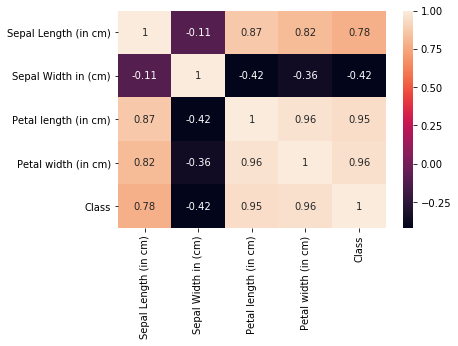

In [40]:
sns.heatmap(iris_corr,annot=True)

In [41]:
high_corr = np.where((iris_corr>-0.1)&(iris_corr<0.1))
high_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#looking at the heat map,table and condition we dont drop any independent variables as there  corr with target variable does not lie in the above range as mentioned in question

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [42]:
iris.var()
low_var = np.where((iris.var()<0.1))
low_var

(array([], dtype=int64),)

In [43]:
iris.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

In [44]:
#There aren't any independent variables that are having no variance or almost zero variance i.e (variance<0.1), hence we do not drop any such variables

## Question 6

*Plot the scatter matrix for all the variables.*

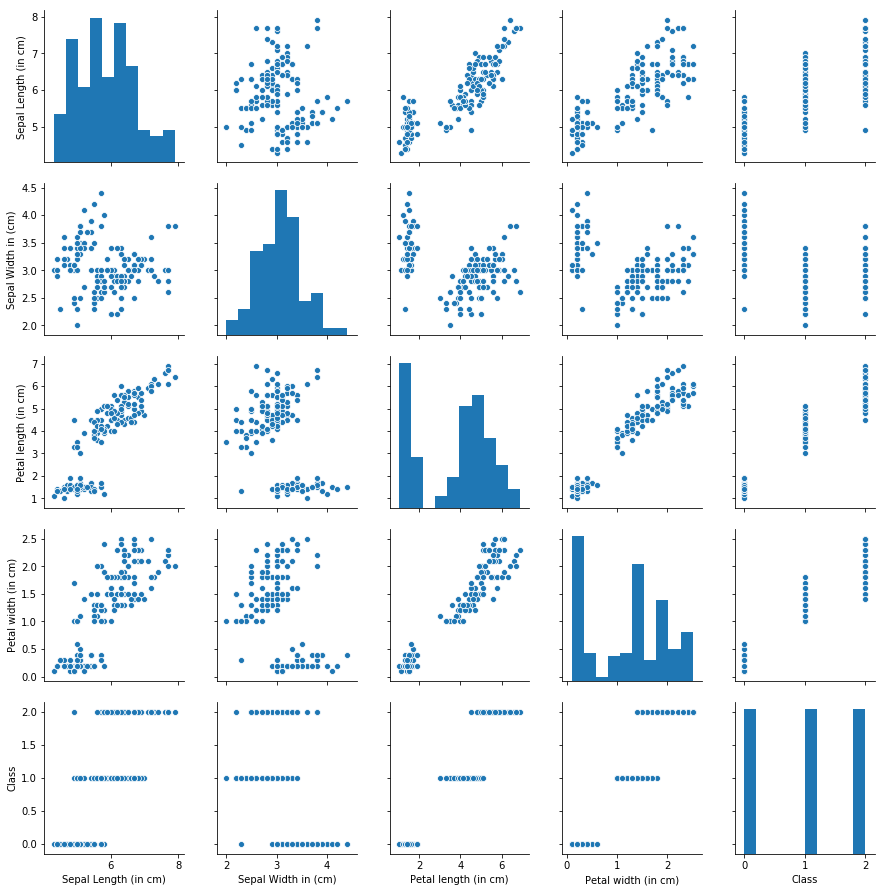

In [46]:
sns.pairplot(iris)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [6]:
from sklearn.model_selection import train_test_split
y = iris['Class']
X = iris.drop('Class',axis=1)
NNH = X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [7]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 3,weights= 'uniform',metric = 'euclidean')
NNH.fit(X_train,y_train)
y_pred = NNH.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


0.9333333333333333

In [8]:
NNH = KNeighborsClassifier(n_neighbors = 5,weights= 'uniform',metric = 'euclidean')
NNH.fit(X_train,y_train)
y_pred = NNH.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9333333333333333

In [9]:
NNH = KNeighborsClassifier(n_neighbors = 9,weights= 'uniform',metric = 'euclidean')
NNH.fit(X_train,y_train)
y_pred = NNH.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9333333333333333

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [18]:
error = []
kin = np.arange(1,20,2)
kin
for k in kin:
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    NNH.fit(X_train,y_train)
    y_pred = NNH.predict(X_test)
    from sklearn.metrics import accuracy_score
    accuracy_score(y_test,y_pred)
    mse = 1 - accuracy_score(y_test,y_pred)
    error.append(mse)
    print(mse)

0.033333333333333326
0.06666666666666665
0.06666666666666665
0.033333333333333326
0.06666666666666665
0.033333333333333326
0.033333333333333326
0.033333333333333326
0.033333333333333326
0.09999999999999998


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Error')

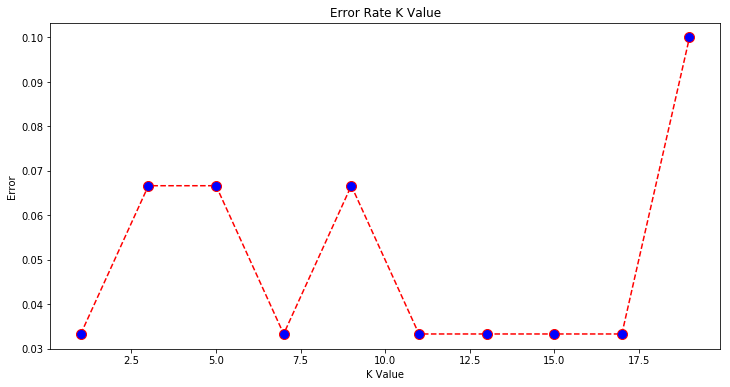

In [19]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(1, 20,2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Error') 

# Naive Bayes with Iris Data

In [20]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [21]:
#The dataset used for Naive bayes is picked from R2 internal lab called iris (1).csv
# As it contains the requiered id and species variable so kindly evaluate the same
#
 
iris_n = pd.read_csv('iris (1).csv')
iris_n
iris_n.sample(n=15)
iris_n['Species']=iris_n.Species.astype('category')
iris_n['Species'] = iris_n['Species'].cat.codes

In [22]:
iris_n["SepalLengthCm"].fillna(value=iris_n["SepalLengthCm"].median(),inplace=True)
iris_n["SepalWidthCm"].fillna(value=iris_n["SepalWidthCm"].median(),inplace=True)
iris_n["PetalLengthCm"].fillna(value=iris_n["PetalLengthCm"].median(),inplace=True)
iris_n["PetalWidthCm"].fillna(value=iris_n["PetalWidthCm"].median(),inplace=True)

In [23]:
y = iris_n['Species']
X = iris_n.drop('Species',axis=1)

In [24]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int8
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5           1.40           0.2
1      2            4.9           3.0           1.40           0.2
2      3            4.7           3.2           1.30           0.2
3      4            4.6           3.1           1.50           0.2
4      5            5.0           3.6           1.40           0.2
5      6 

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

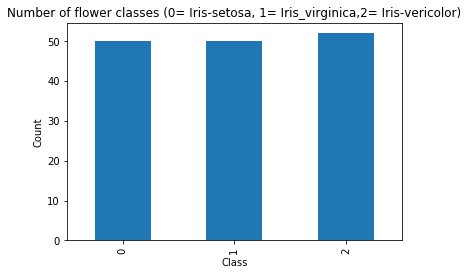

In [25]:
plt.figure()
pd.Series(iris_n['Species']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Number of flower classes (0= Iris-setosa, 1= Iris_virginica,2= Iris-vericolor)');

In [26]:
#Drop Id variable from data
iris_d =  iris_n.drop('Id',axis=1)
iris_d

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,4.7,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


# Question 12 
Find Correlation among all variables and give your insights 


In [27]:
iris_corr = iris_d.corr()
iris_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


In [28]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [29]:
iris_n.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Split data in Training and test set in 80:20.

In [30]:
X=iris_d.drop(['Species'], axis=1)
Y=iris_d['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [33]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Question 14 
Train and Fit NaiveBayes Model

In [34]:
#train
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [35]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)
y_pred_GNB

array([1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 1, 1, 0, 2], dtype=int8)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [37]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[ 7  0  0]
 [ 0 12  2]
 [ 0  0 10]]


In [38]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.9354838709677419

In [ ]:
#Show precision and Recall metrics

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

   micro avg       0.94      0.94      0.94        31
   macro avg       0.94      0.95      0.94        31
weighted avg       0.95      0.94      0.94        31

